In [1]:
import numpy as np
import h5py

model_name = 'neuronal_model_491766131'

im_file_name = 'lfp_result/' + model_name + '_Im.h5'
with h5py.File(im_file_name, 'r') as hf:
    dt = hf.attrs['dt']
    im = hf['data'][()]
    seg_coords = {}
    for key in hf['seg_coords']:
        seg_coords[key] = hf['seg_coords'][key][()]

morph_file_name = 'lfp_result/' + model_name + '_SegProp.h5'
with h5py.File(morph_file_name, 'r') as hf:
    seg_prop = {}
    for key in hf['seg_prop']:
        seg_prop[key] = hf['seg_prop'][key][()]

In [2]:
t = dt * np.arange(im.shape[1])
# im_den = im / np.expand_dims(seg_prop['seg_area'], 1) # nA/um^2
im_den = im / np.diff(seg_prop['distance'], axis=1) # nA/um

select_seg = None #seg_coords['pc'][:,0] > -50
# select_seg = seg_prop['swc_type'] != 1 # excluding soma

var = im_den
varname = 'Transmembrane current density per unit length (nA/um)'
axes = ['x', 'y']
n_dist = 10
max_per_dist = 2
space = 0.01
normalized_space = False
sort_by_dist = True
figsize = (12,9)
fontsize = 15
scalebar_size = 50

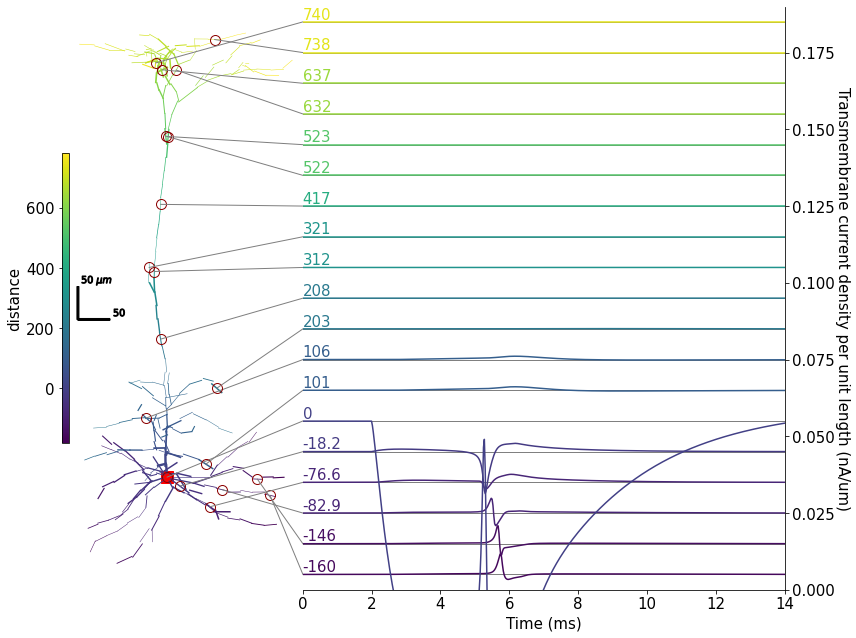

In [3]:
from utils.plotting.plot_variable_with_morphology import plot_variable_with_morphology
%matplotlib inline

_ = plot_variable_with_morphology(seg_coords, seg_prop, var, t=t, axes=axes,
                                  distance_type='distance', n_dist=n_dist,
                                  select_seg=select_seg, max_per_dist=max_per_dist, varname=varname,
                                  space=space, normalized_space=normalized_space, sort_by_dist=sort_by_dist,
                                  figsize=figsize, fontsize=fontsize, scalebar_size=scalebar_size)

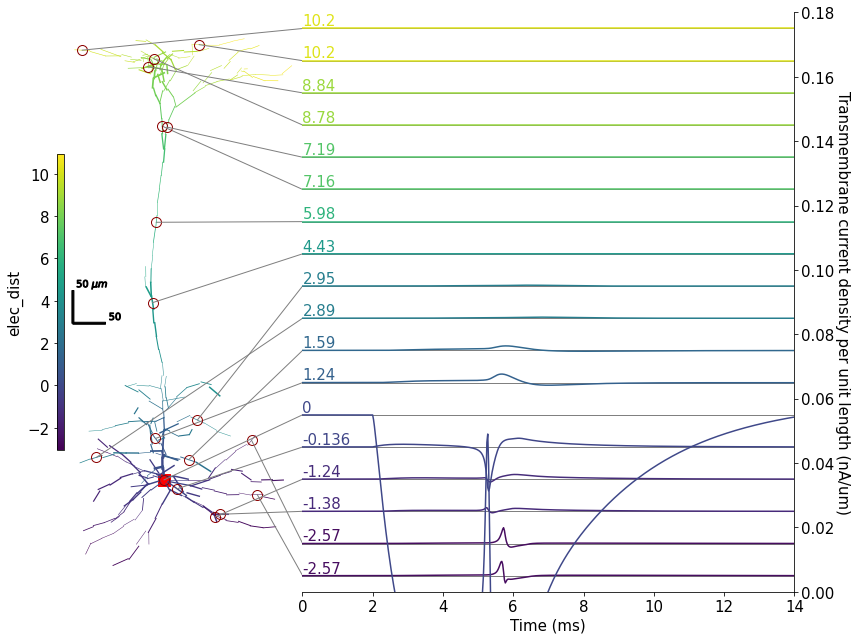

In [4]:
_ = plot_variable_with_morphology(seg_coords, seg_prop, var, t=t, axes=axes,
                                  distance_type='elec_dist', n_dist=n_dist,
                                  select_seg=select_seg, max_per_dist=max_per_dist, varname=varname,
                                  space=space, normalized_space=normalized_space, sort_by_dist=sort_by_dist,
                                  figsize=figsize, fontsize=fontsize, scalebar_size=scalebar_size)

Soma radius: 6.9552998542785645 um


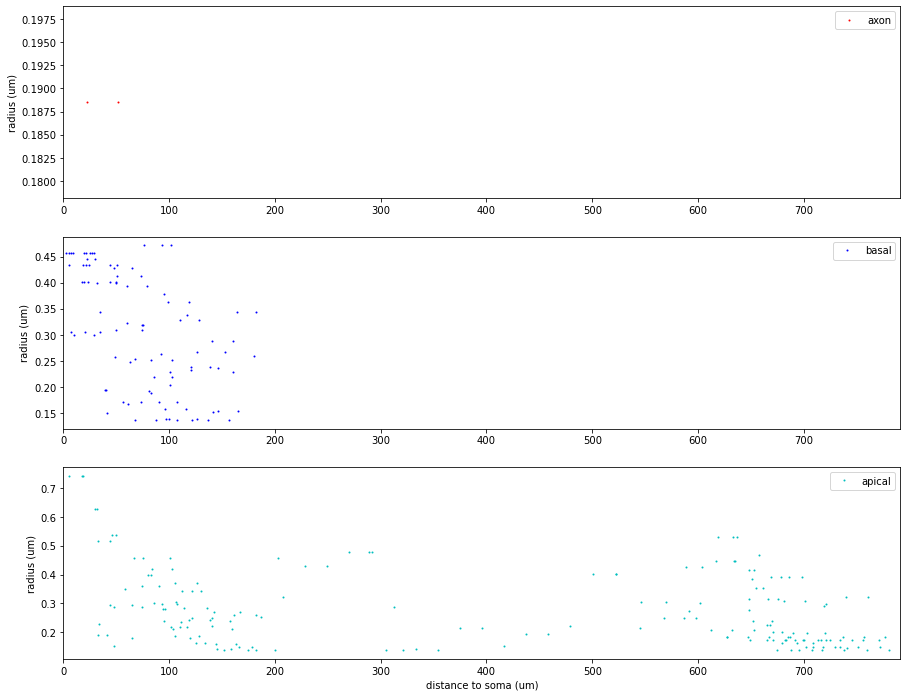

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot radius distribution
print('Soma radius: {} um'.format(seg_coords['r'][seg_prop['swc_type']==1][0]))

dist05 = np.abs(np.mean(seg_prop['distance'], axis=1))
colors = ['r', 'b', 'c']
names = ['axon', 'basal', 'apical']
plt.figure(figsize=(15,12))
for i in range(3):
    plt.subplot(3,1,i+1)
    idx = seg_prop['swc_type'] == i + 2
    plt.plot(dist05[idx], seg_coords['r'][idx], '.', color=colors[i], label=names[i], markersize=2)
    plt.legend(loc=1)
    plt.ylabel('radius (um)')
    plt.xlim([0, np.amax(seg_prop['distance'])])
plt.xlabel('distance to soma (um)')
plt.show()

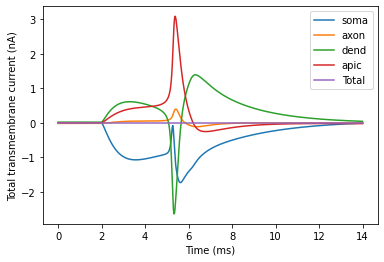

True

In [6]:
swc_type_id = {'soma': 1, 'axon': 2, 'dend': 3, 'apic': 4}
seg_type_idx = {s: seg_prop['swc_type']==i for s, i in swc_type_id.items()}
im_sec = {s: np.sum(im[idx], axis=0) for s, idx in seg_type_idx.items()}

Im_tot = np.zeros(im.shape[1])
plt.figure()
for s, I in im_sec.items():
    Im_tot += I
    plt.plot(t, I, label=s)
plt.plot(t, Im_tot, label='Total')
plt.xlabel('Time (ms)')
plt.ylabel('Total transmembrane current (nA)')
plt.legend()
plt.show()

np.allclose(Im_tot, 0)